## Step 4: post-processing the clustering algorithm results

The output geotiff from step 3 will likely have noise and small artefacts that we need to remove before the classified data is actually useful. THis notebook does the following:

- uses opening and closing functions to remove small patches of pixels below a threshold
- uses a median filter to further filter out noise and artefacts
- combines the opening, closing and median filters
- create a new raster from the post-processed classified image
- performs a polygonisation operation to extract the shapes and values from the raster and output a vector geodataframe
- save out the geodataframe as a geojson multipolygon
    - this can be changed to a shapefile or written to postGIS as required


##### These post-processing steps are examples only. Before this goes into production it is important to find the right balance of removing noise without removing important data. This is a demo to show HOW these steps can be done but this is not validated or tested yet.

In [18]:
%pip install scikit-image -q
%pip install --upgrade hvplot holoviews panel jupyter_bokeh bokeh -q

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


<img src='data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAAAEAAAABACAYAAACqaXHeAAAABHNCSVQICAgIfAhkiAAAAAlwSFlz
AAAB+wAAAfsBxc2miwAAABl0RVh0U29mdHdhcmUAd3d3Lmlua3NjYXBlLm9yZ5vuPBoAAA6zSURB
VHic7ZtpeFRVmsf/5966taWqUlUJ2UioBBJiIBAwCZtog9IOgjqACsogKtqirT2ttt069nQ/zDzt
tI4+CrJIREFaFgWhBXpUNhHZQoKBkIUASchWla1S+3ar7r1nPkDaCAnZKoQP/D7mnPOe9/xy76n3
nFSAW9ziFoPFNED2LLK5wcyBDObkb8ZkxuaoSYlI6ZcOKq1eWFdedqNzGHQBk9RMEwFAASkk0Xw3
ETacDNi2vtvc7L0ROdw0AjoSotQVkKSvHQz/wRO1lScGModBFbDMaNRN1A4tUBCS3lk7BWhQkgpD
lG4852/+7DWr1R3uHAZVQDsbh6ZPN7CyxUrCzJMRouusj0ipRwD2uKm0Zn5d2dFwzX1TCGhnmdGo
G62Nna+isiUqhkzuKrkQaJlPEv5mFl2fvGg2t/VnzkEV8F5ioioOEWkLG86fvbpthynjdhXYZziQ
x1hC9J2NFyi8vCTt91Fh04KGip0AaG9zuCk2wQCVyoNU3Hjezee9bq92duzzTmxsRJoy+jEZZZYo
GTKJ6SJngdJqAfRzpze0+jHreUtPc7gpBLQnIYK6BYp/uGhw9YK688eu7v95ysgshcg9qSLMo3JC
4jqLKQFBgdKDPoQ+Pltb8dUyQLpeDjeVgI6EgLIQFT5tEl3rn2losHVsexbZ3EyT9wE1uGdkIPcy
BGxn8QUq1QrA5nqW5i2tLqvrrM9NK6AdkVIvL9E9bZL/oyfMVd/jqvc8LylzRBKDJSzIExwhQzuL
QYGQj4rHfFTc8mUdu3E7yoLtbTe9gI4EqVgVkug2i5+uXGo919ixbRog+3fTbQ8qJe4ZOYNfMoTI
OoshUNosgO60AisX15aeI2PSIp5KiFLI9ubb1vV3Qb2ltwLakUCDAkWX7/nHKRmmGIl9VgYsUhJm
2NXjKYADtM1ygne9QQDIXlk49FBstMKx66D1v4+XuQr7vqTe0VcBHQlRWiOCbmmSYe2SqtL6q5rJ
zsTb7lKx3FKOYC4DoqyS/B5bvLPxvD9Qtf6saxYLQGJErmDOdOMr/zo96km1nElr8bmPOBwI9COv
HnFPRIwmkSOv9kcAS4heRsidOkpeWBgZM+UBrTFAXNYL5Vf2ii9c1trNzpYdaoVil3WIc+wdk+gQ
noie3ecCcxt9ITcLAPWt/laGEO/9U6PmzZkenTtsSMQ8uYywJVW+grCstAvCIaAdArAsIWkRDDs/
KzLm2YcjY1Lv0UdW73HabE9n6V66cxSzfEmuJssTpKGVp+0vHq73FwL46eOjpMpbRAnNmJFrGJNu
Ukf9Yrz+3rghiumCKNXXWPhLYcjxGsIpoCMsIRoFITkW8AuyM8jC1+/QLx4bozCEJIq38+1rtpR6
V/yzb8eBlRb3fo5l783N0CWolAzJHaVNzkrTzlEp2bQ2q3TC5gn6wpnoQAmwSiGh2GitnTmVMc5O
UyfKWUKCIsU7+fZDKwqdT6DDpvkzAX4/+AMFjk0tDp5GRXLpQ2MUmhgDp5gxQT8+Y7hyPsMi8uxF
71H0oebujHALECjFKaW9Lm68n18wXp2kVzIcABytD5iXFzg+WVXkegpAsOOYziqo0OkK76GyquC3
ltZAzMhhqlSNmmWTE5T6e3IN05ITFLM4GdN0vtZ3ob8Jh1NAKXFbm5PtLU/eqTSlGjkNAJjdgn/N
aedXa0tdi7+t9G0FIF49rtMSEgAs1kDLkTPO7ebm4IUWeyh1bKomXqlgMG6kJmHcSM0clYLJ8XtR
1GTnbV3F6I5wCGikAb402npp1h1s7LQUZZSMIfALFOuL3UUrfnS8+rez7v9qcold5tilgHbO1fjK
9ubb17u9oshxzMiUBKXWqJNxd+fqb0tLVs4lILFnK71H0Ind7uiPgACVcFJlrb0tV6DzxqqTIhUM
CwDf1/rrVhTa33/3pGPxJYdQ2l2cbgVcQSosdx8uqnDtbGjh9SlDVSMNWhlnilfqZk42Th2ZpLpf
xrHec5e815zrr0dfBZSwzkZfqsv+1FS1KUknUwPARVvItfKUY+cn57yP7qv07UE3p8B2uhUwLk09
e0SCOrK+hbdYHYLjRIl71wWzv9jpEoeOHhGRrJAzyEyNiJuUqX0g2sBN5kGK6y2Blp5M3lsB9Qh4
y2Ja6x6+i0ucmKgwMATwhSjdUu49tKrQ/pvN5d53ml2CGwCmJipmKjgmyuaXzNeL2a0AkQ01Th5j
2DktO3Jyk8f9vcOBQHV94OK+fPumJmvQHxJoWkaKWq9Vs+yUsbq0zGT1I4RgeH2b5wef7+c7bl8F
eKgoHVVZa8ZPEORzR6sT1BzDUAD/d9F78e2Tzv99v8D+fLVTqAKAsbGamKey1Mt9Ann4eH3gTXTz
idWtAJ8PQWOk7NzSeQn/OTHDuEikVF1R4z8BQCy+6D1aWRfY0tTGG2OM8rRoPaeIj5ZHzJxszElN
VM8K8JS5WOfv8mzRnQAKoEhmt8gyPM4lU9SmBK1MCQBnW4KONT86v1hZ1PbwSXPw4JWussVjtH9Y
NCoiL9UoH/6PSu8jFrfY2t36erQHXLIEakMi1SydmzB31h3GGXFDFNPaK8Rme9B79Ixrd0WN+1ij
NRQ/doRmuFLBkHSTOm5GruG+pFjFdAmorG4IXH1Qua6ASniclfFtDYt+oUjKipPrCQB7QBQ2lrgP
fFzm+9XWUtcqJ3/5vDLDpJ79XHZk3u8nGZ42qlj1+ydtbxysCezrydp6ugmipNJ7WBPB5tydY0jP
HaVNzs3QzeE4ZpTbI+ZbnSFPbVOw9vsfnVvqWnirPyCNGD08IlqtYkh2hjZ5dErEQzoNm+6ykyOt
Lt5/PQEuSRRKo22VkydK+vvS1XEKlhCJAnsqvcVvH7f/ZU2R67eXbMEGAMiIV5oWZWiWvz5Fv2xG
sjqNJQRvn3Rs2lji/lNP19VjAQDgD7FHhujZB9OGqYxRkZxixgRDVlqS6uEOFaJUVu0rPFzctrnF
JqijImVp8dEKVWyUXDk92zAuMZ6bFwpBU1HrOw6AdhQgUooChb0+ItMbWJitSo5Ws3IAOGEOtL53
0vHZih9sC4vtofZ7Qu6523V/fmGcds1TY3V36pUsBwAbSlxnVh2xLfAD/IAIMDf7XYIkNmXfpp2l
18rkAJAy9HKFaIr/qULkeQQKy9zf1JgDB2uaeFNGijo5QsUyacNUUTOnGO42xSnv4oOwpDi1zYkc
efUc3I5Gk6PhyTuVKaOGyLUAYPGIoY9Pu/atL/L92+4q9wbflRJ2Trpm/jPjdBtfnqB/dIThcl8A
KG7hbRuKnb8qsQsVvVlTrwQAQMUlf3kwJI24Z4JhPMtcfng5GcH49GsrxJpGvvHIaeem2ma+KSjQ
lIwUdYyCY8j4dE1KzijNnIP2llF2wcXNnsoapw9XxsgYAl6k+KzUXbi2yP3KR2ecf6z3BFsBICdW
nvnIaG3eHybqX7vbpEqUMT+9OL4Qpe8VON7dXuFd39v19FoAABRVePbGGuXTszO0P7tu6lghUonE
llRdrhArLvmKdh9u29jcFiRRkfLUxBiFNiqSU9icoZQHo5mYBI1MBgBH6wMNb+U7Pnw337H4gi1Y
ciWs+uks3Z9fztUvfzxTm9Ne8XXkvQLHNytOOZeiD4e0PgkAIAYCYknKUNUDSXEKzdWNpnil7r4p
xqkjTarZMtk/K8TQ6Qve78qqvXurGwIJqcOUKfUWHsm8KGvxSP68YudXq4pcj39X49uOK2X142O0
Tz5/u/7TVybqH0rSya6ZBwD21/gubbrgWdDgEOx9W
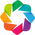

In [19]:
import os
import json
from io import StringIO
from gis_utils.dataframe import get_bbox_from_geodf
import pandas as pd
import geopandas as gpd
import rioxarray
import rasterio.features
import xarray as xr
from skimage.morphology import opening, square, disk, closing
from skimage import filters
import matplotlib.pyplot as plt
import shapely

import holoviews as hv
import hvplot.pandas
hv.extension('bokeh')

import or use this geojson to mask out the area outside the property

In [20]:
geojson = {
    'body': {
        "type": "FeatureCollection",
        "name": "dissolved-boundaries",
        "crs": {
            "type": "name",
            "properties": {
                "name": "urn:ogc:def:crs:OGC:1.3:CRS84" 
            }
        },
        "features": [
            {
                "type": "Feature",
                "properties": {
                    "fid": 1
                },
                "geometry": {
                    "type": "Polygon",
                    "coordinates": [
                        [
                            [116.26012130269045, -29.225295369642396],
                            [116.261724812149055, -29.241374854584375],
                            [116.283751968396274, -29.256813692452539],
                            [116.284342735038919, -29.268250184258388],
                            [116.292247755352392, -29.265992437426529],
                            [116.292360282331941, -29.293057573630019],
                            [116.314865678242256, -29.293523728033122],
                            [116.326259034921833, -29.293033039128805],
                            [116.326315298411629, -29.305397680579894],
                            [116.355065941687045, -29.307016748931797],
                            [116.355065941687045, -29.306575187382712],
                            [116.383366477044206, -29.307384715430175],
                            [116.384322956370426, -29.290407813444993],
                            [116.387586238777402, -29.282629879611861],
                            [116.386517232471661, -29.259807919053017],
                            [116.359201308185533, -29.259488866292969],
                            [116.359229439930417, -29.259243440415627],
                            [116.35242155766754, -29.259292525638209],
                            [116.352140240218716, -29.220237788279107],
                            [116.302234524787593, -29.223503148505326],
                            [116.281388901825679, -29.2239696200396],
                            [116.26012130269045, -29.225295369642396]
                        ]
                    ]
                }
            }
        ]
    }
}

req = geojson
geojson_data = req['body']

gdf = gpd.read_file(StringIO(json.dumps(geojson_data)))
gdf.to_crs(epsg=3857, inplace=True)

bbox = get_bbox_from_geodf(geojson_data)

In [21]:
input_dir = "/workspace/notebooks/sandbox/stratification/showcase/data/03-classification"
output_dir = "/workspace/notebooks/sandbox/stratification/showcase/data/04-post_processing"

input_img = rioxarray.open_rasterio(os.path.join(input_dir, "kmeans_draft.tiff"))


The sk-image functions need the data to have the x and y dimensions first, so transpose the imported raster from (`band`,`y`,`x`) to (`y`,`x`,`band`). Yes, y comes before x in this case, its note a typo

In [22]:
input_img_T = input_img.transpose('y', 'x', 'band')
input_img_T =  input_img_T.squeeze()

Perform the sk-image filtering steps. This notebook uses `opening`, `closing` and `median` filtering. Change the `disk_size` to alter the minimum size of the filters. The larger the `disk_size` the more data will be filtered out.

In [23]:
disk_size = 2

cleaned_opening = opening(input_img_T, square(disk_size))

cleaned_closing = closing(input_img_T, square(disk_size))

median_filter = filters.median(input_img_T, disk(disk_size))

median_closing = filters.median(cleaned_closing, disk(disk_size))

median_opening = filters.median(cleaned_opening, disk(disk_size))

opening_closing = closing(opening(input_img_T, square(disk_size)), square(disk_size))

median_opening_closing = filters.median(closing(median_opening, disk(disk_size)))

plot the results to compare

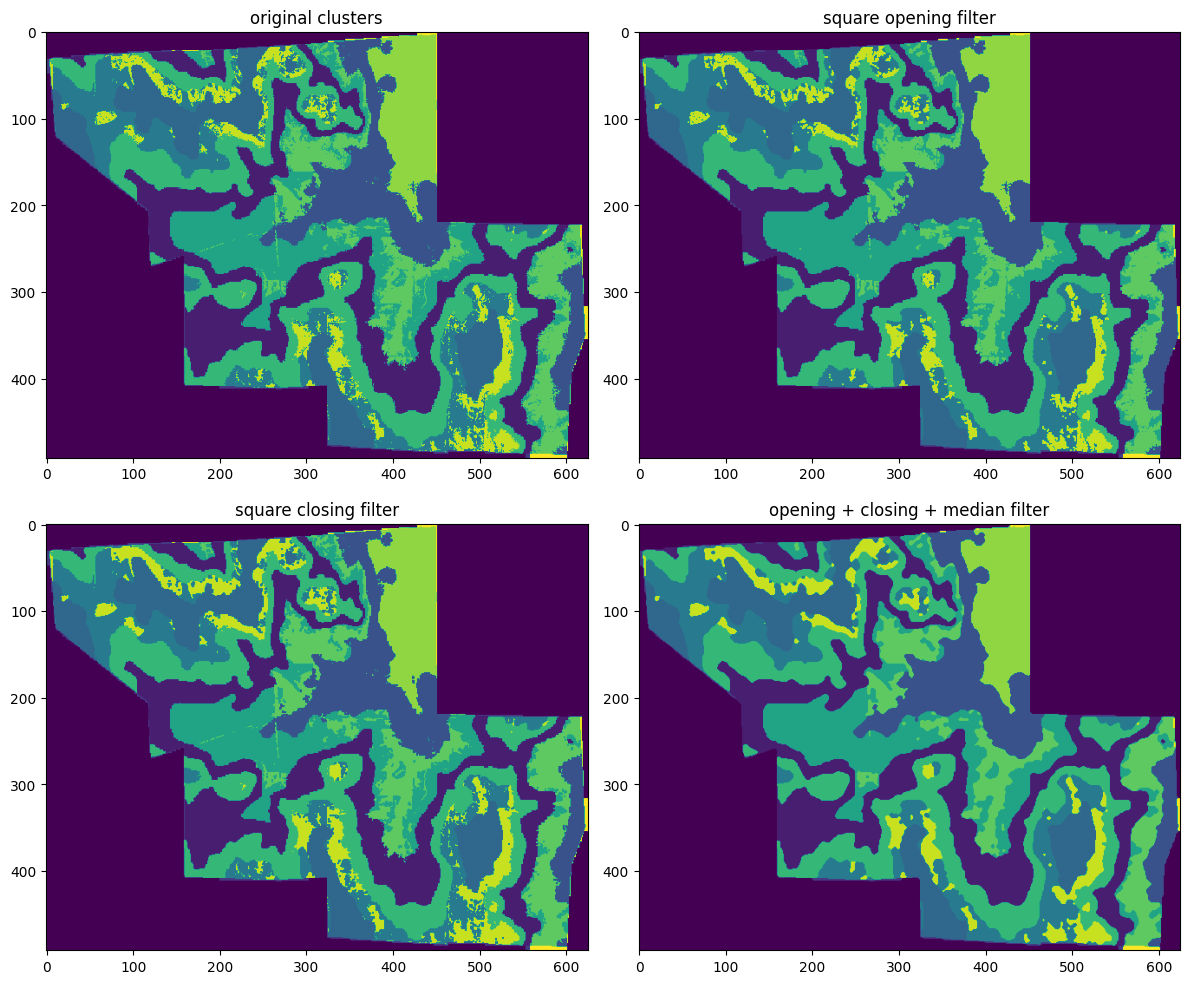

In [24]:
n_rows = 2
n_cols=2

# display results
fig, ax = plt.subplots(nrows=n_rows, ncols=n_cols, figsize=(n_cols*6, n_rows*5))

ax[0,0].imshow(input_img_T, cmap='viridis')
ax[0,0].set_title(r'original clusters')

ax[0,1].imshow(cleaned_opening, cmap='viridis')
ax[0,1].set_title(r'square opening filter')

ax[1,0].imshow(cleaned_closing, cmap='viridis')
ax[1,0].set_title(r'square closing filter')


ax[1,1].imshow(median_opening_closing, cmap='viridis')
ax[1,1].set_title(r'opening + closing + median filter')


fig.tight_layout()
plt.show()

Same as in the third notebook, the results of these filters are standard data arrays, and so do not have any spatial information. We do the same steps that we did to create a spatially aware raster in the previous notebook. Create a new data array, populate it with the results of the filtering step, then write all of the spatial data to the new raster using metadata pulled from the input geotiff (the raw classification results geotiff).

In [25]:
processed_img = xr.DataArray(
    median_opening_closing, 
    coords={
        'y': input_img.coords['y'],
        'x': input_img.coords['x']
    },
    dims=['y', 'x']
)

In [26]:
processed_img.rio.write_crs(input_img.rio.crs, inplace=True)
processed_img.rio.write_transform(input_img.rio.transform(), inplace=True)
processed_img.rio.write_coordinate_system(inplace=True)

processed_img.rio.update_attrs(input_img.attrs, inplace=True)
processed_img.rio.update_encoding(input_img.encoding, inplace=True)
processed_img.rio.write_nodata(-9999, inplace=True)

<xarray.DataArray (y: 492, x: 625)> Size: 1MB
array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)
Coordinates:
  * y            (y) float64 4kB -3.404e+06 -3.404e+06 ... -3.415e+06 -3.415e+06
  * x            (x) float64 5kB 1.294e+07 1.294e+07 ... 1.296e+07 1.296e+07
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -9999
    scale_factor:   1.0
    add_offset:     0.0

##### Don't forget to mask the raster before saving it out

In [27]:
processed_img = processed_img.rio.clip(gdf.geometry.values, drop=False, invert=False)
processed_img.rio.to_raster(os.path.join(output_dir, "kmeans_draft_postprocessed.tiff"))

This 'test' geotiff is where we get the spatial metadata used later on to create a new geotiff with the post-processed results

In [28]:
test_rast = rioxarray.open_rasterio(os.path.join(output_dir, "kmeans_draft_postprocessed.tiff"))

Extract the features from the raster so that we can convert them to polygons:

In [29]:
shapes = rasterio.features.shapes(test_rast.values, mask=test_rast.values != -9999, transform=test_rast.rio.transform(), connectivity=4)
pol = list(shapes)
geom = [shapely.geometry.shape(i[0]) for i in pol]
geom = gpd.GeoSeries(geom, crs=test_rast.rio.crs)

Also extract the values (the classes from the classifier) so that the polygons have data attached to them telling us what class they represent

In [30]:
values = [i[1] for i in pol]
values = pd.Series(values)

Append the polygons and the values together to create a geodataframe:

In [31]:
result = gpd.GeoDataFrame({'value': values, 'geometry': geom})

Save the geodataframe out as a geojson (or shapefile, or write to a postGIS DB)

In [32]:
result.to_file(os.path.join(output_dir, "kmeans_draft_postprocessed.geojson"),  driver="GeoJSON")

In [33]:
test_rast

<xarray.DataArray (band: 1, y: 492, x: 625)> Size: 1MB
array([[[-9999, -9999, ..., -9999, -9999],
        [-9999, -9999, ..., -9999, -9999],
        ...,
        [-9999, -9999, ..., -9999, -9999],
        [-9999, -9999, ..., -9999, -9999]]], dtype=int32)
Coordinates:
  * band         (band) int64 8B 1
  * x            (x) float64 5kB 1.294e+07 1.294e+07 ... 1.296e+07 1.296e+07
  * y            (y) float64 4kB -3.404e+06 -3.404e+06 ... -3.415e+06 -3.415e+06
    spatial_ref  int64 8B 0
Attributes:
    AREA_OR_POINT:  Area
    _FillValue:     -9999
    scale_factor:   1.0
    add_offset:     0.0

In [34]:
result.hvplot(tiles='EsriImagery', width=1200, height=800, c='value', cmap='hsv', title='Vector (geojson) data:')

:Overlay
   .Tiles.I    :Tiles   [x,y]
   .Polygons.I :Polygons   [x,y]   (value)